In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.makedirs('./figures', exist_ok=True)

In [3]:
df = pd.read_csv("scri_results.csv")

In [4]:
base_F = df['F_norm'].mean()
base_S = df['S_norm'].mean()
base_L = df['L_norm'].mean()

In [5]:
def compute_scri(F, S, L, weights=[0.4, 0.35, 0.25]):
    return weights[0]*F + weights[1]*S + weights[2]*L

base_scri = compute_scri(base_F, base_S, base_L)

In [6]:
n_simulations = 5000
weight_scheme = [0.4, 0.35, 0.25]

In [7]:
scenarios = {
    'Severity +20%': lambda F, S, L: compute_scri(F, S * 1.2, L, weight_scheme),
    'Severity -20%': lambda F, S, L: compute_scri(F, S * 0.8, L, weight_scheme),
    'Frequency CV +15%': lambda F, S, L: compute_scri(F * 1.15, S, L, weight_scheme),
    'Frequency CV -15%': lambda F, S, L: compute_scri(F * 0.85, S, L, weight_scheme),
}

In [8]:
results = {scenario: [] for scenario in scenarios}
results['Base'] = []

In [9]:
for _ in range(n_simulations):
    F = np.random.normal(loc=base_F, scale=0.05)
    S = np.random.normal(loc=base_S, scale=0.05)
    L = np.random.normal(loc=base_L, scale=0.05)

    results['Base'].append(compute_scri(F, S, L, weight_scheme))

    for label, fn in scenarios.items():
        results[label].append(fn(F, S, L))

In [10]:
df_sim = pd.DataFrame(results)
tornado = pd.DataFrame({
    'Scenario': [k for k in scenarios],
    'Change': [df_sim[k].mean() - df_sim['Base'].mean() for k in scenarios]
})

In [11]:
tornado['Abs Change'] = np.abs(tornado['Change'])
tornado_sorted = tornado.sort_values(by='Abs Change', ascending=True)

C:\Users\Puneet\AppData\Local\Temp\ipykernel_1680\328837877.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Scenario', x='Change', data=tornado_sorted, palette='coolwarm', orient='h')


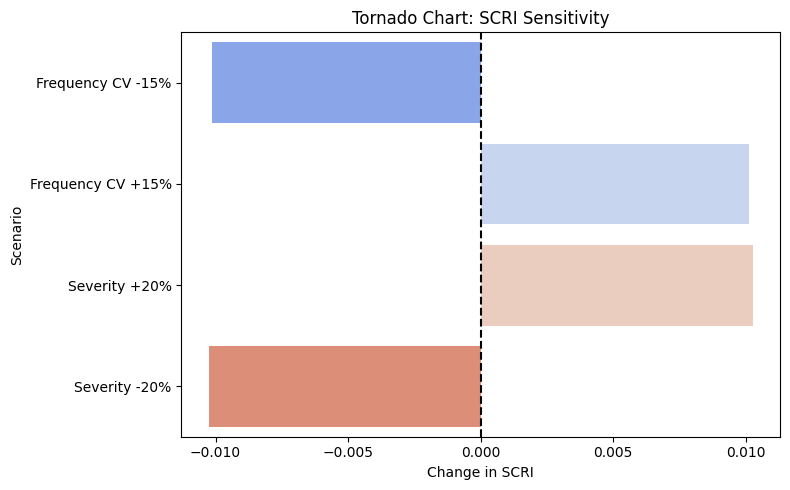

In [12]:
plt.figure(figsize=(8, 5))
sns.barplot(y='Scenario', x='Change', data=tornado_sorted, palette='coolwarm', orient='h')
plt.axvline(0, color='black', linestyle='--')
plt.title('Tornado Chart: SCRI Sensitivity')
plt.xlabel('Change in SCRI')
plt.ylabel('Scenario')
plt.tight_layout()
plt.savefig('./figures/scri_tornado_chart.png')
plt.show()

In [13]:
print("Tornado chart saved to ./figures/scri_tornado_chart.png")
print(tornado_sorted[['Scenario', 'Change']].to_string(index=False))

Tornado chart saved to ./figures/scri_tornado_chart.png
         Scenario    Change
Frequency CV -15% -0.010119
Frequency CV +15%  0.010119
    Severity +20%  0.010262
    Severity -20% -0.010262
